<a href="https://colab.research.google.com/github/DeepthiManthapuram/MachineLearning-Algorithms/blob/main/KNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
from sklearn.datasets import load_breast_cancer
cancer=load_breast_cancer()

In [3]:
cancer['feature_names']

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

In [6]:
dataset=pd.DataFrame(np.c_[cancer['data'],cancer['target']],columns=np.append(cancer['feature_names'],['target']))

In [7]:
#creating feature matrix
x=dataset.iloc[:,:-1].values
y=dataset.iloc[:,-1].values

In [8]:
#training set and test set
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [9]:
#feature scaling
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x_train=sc.fit_transform(x_train)
x_test=sc.transform(x_test)

In [13]:
from sklearn.neighbors import KNeighborsClassifier
classifier=KNeighborsClassifier(n_neighbors=25,metric='minkowski')
classifier.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=25)

In [17]:
y_pred = classifier.predict(x_test)

In [18]:
#accuracy
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.956140350877193

<Axes: >

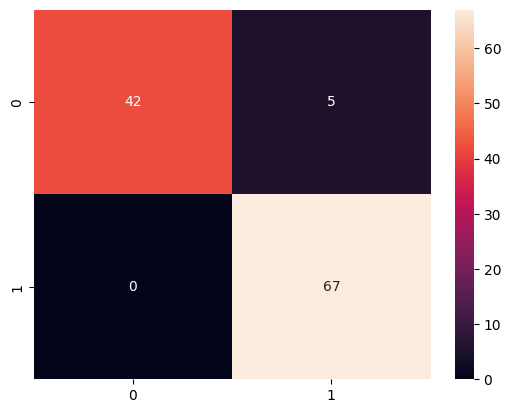

In [20]:
import seaborn as sns
#confusion matrix
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred)
sns.heatmap(cm,annot=True)